In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import pylab as plt

In [2]:
t0 = 2437368.474
p = 1.686094

# Yıldıza ait parametreler

In [3]:
df = pd.read_excel("C:/Users/HUAWEI/Desktop/AUBB/Makale/Y_Leo_mins/YLeo_O-C.xlsx")
df

,Min(HJD),method,evre,mutlak evre,o-c,obs,Min(BJD),evre2,m.evre,o-c2,Unnamed: 10,t0,2437368.474034,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2.460291e+06,V,13594.993242,13595.0,-0.011395,Aavso,2.460291e+06,13594.993512,13595.0,-0.010940,NaN,p,1.686094,NaN,NaN,NaN
1,2.460073e+06,V,13465.995146,13466.0,-0.008184,Aavso,2.460073e+06,13465.995371,13466.0,-0.007805,NaN,NaN,NaN,NaN,NaN,NaN
2,2.460068e+06,V,13462.994192,13463.0,-0.009792,Aavso,2.460068e+06,13462.994353,13463.0,-0.009522,NaN,NaN,NaN,NaN,NaN,NaN
3,2.460062e+06,V,13458.995984,13459.0,-0.006771,Aavso,2.460062e+06,13458.995762,13459.0,-0.007146,NaN,NaN,NaN,NaN,NaN,NaN
4,2.460018e+06,V,13432.991180,13433.0,-0.014872,Aavso,2.460018e+06,13432.991282,13433.0,-0.014700,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2.458553e+06,V,12564.006692,12564.0,0.011284,Brno,2.458553e+06,12564.006515,12564.0,0.010985,NaN,NaN,NaN,NaN,NaN,NaN
696,2.458569e+06,V,12574.007084,12574.0,0.011944,Brno,2.458569e+06,12574.007144,12574.0,0.012045,NaN,NaN,NaN,NaN,NaN,NaN
697,2.458886e+06,Ir,12762.003601,12762.0,0.006072,Brno,2.458886e+06,12762.003786,12762.0,0.006383,NaN,NaN,NaN,NaN,NaN,NaN
698,2.458934e+06,V,12790.004413,12790.0,0.007440,Brno,2.458934e+06,12790.004598,12790.0,0.007753,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
max_v = df["o-c"].max()
min_v = df["o-c"].min()
amp1 = max_v - min_v
b=max_v +min_v
print (max_v,min_v,amp1,b)

0.17831599991768599 -0.020588000304996967 0.19890400022268295 0.15772799961268902


In [4]:
class_counts= df['method'].value_counts()
class_counts

method
vis     378
Tess    120
Vis      69
V        64
ccd      28
pg       15
Ir       10
?         3
Na        2
pe        2
R         2
Ic        2
Rc        2
TG        1
C         1
I         1
Name: count, dtype: int64

In [5]:
x=df['mutlak evre'].astype(float)
y=df['o-c']
method=df['method']

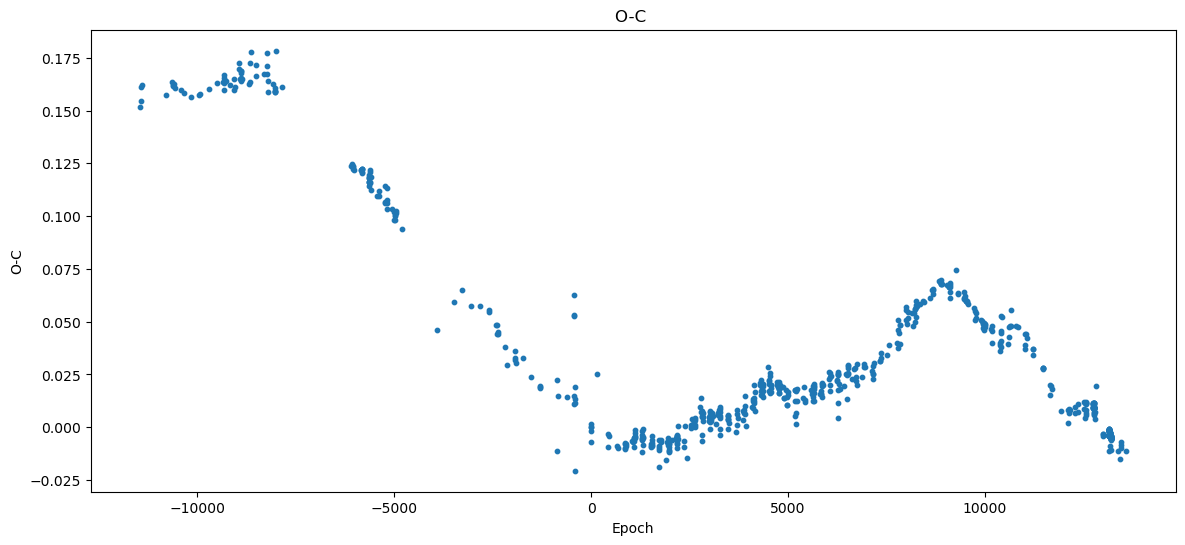

In [6]:
plt.scatter(x,y, s=10)
plt.title('O-C ')
plt.xlabel('Epoch')
plt.ylabel('O-C')
plt.gcf().set_size_inches(14, 6)
#plt.xlim(-12000,14000)
#plt.ylim(-0.07,0.20)

plt.show()

a = 4.937908415667895e-10, b = -7.86191351016391e-06, c = 0.038322561518640615


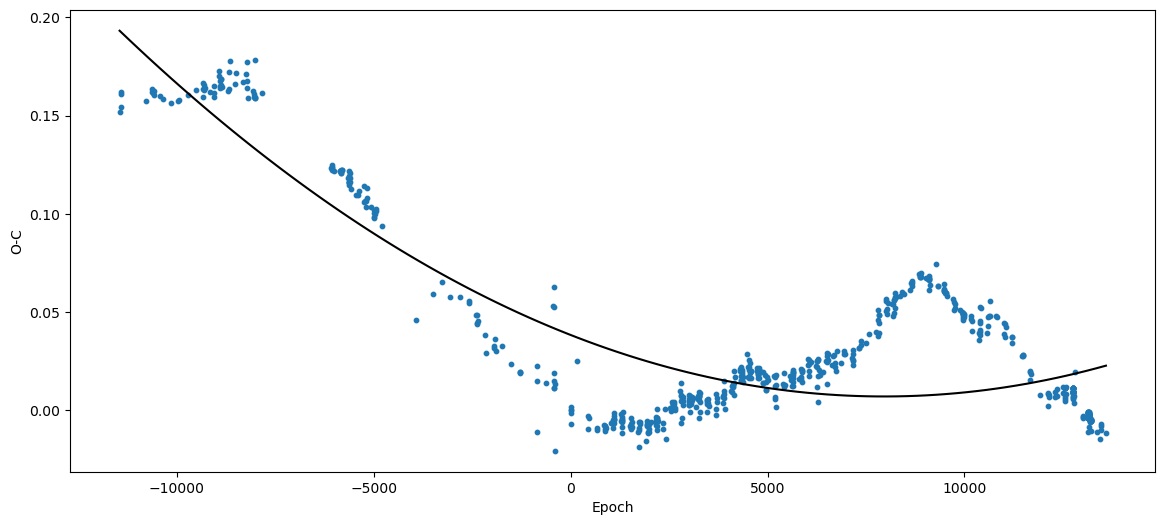

In [7]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

p0 = (1, 1, 1)

popt, pcov = curve_fit(parabola, x, y, p0=p0)

print(f"a = {popt[0]}, b = {popt[1]}, c = {popt[2]}")

# Orijinal verileri ve uyumu çiz
plt.scatter(x, y,  s=10)
plt.gcf().set_size_inches(14, 6)

x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, parabola(x_fit, *popt), 'k-')
plt.xlabel('Epoch')
plt.ylabel('O-C')

#plt.legend()
plt.show()

In [8]:
a = 4.937908415667895e-10
b = -7.86191351016391e-06
c = 0.038322561518640615

In [9]:
(a* x * x + b * x + c)

0      0.022704
1      0.021995
2      0.021978
3      0.021957
4      0.021816
         ...   
695    0.017492
696    0.017538
697    0.018412
698    0.018545
699    0.020413
Name: mutlak evre, Length: 700, dtype: float64

In [10]:
df['Polinom Res.'] = y -(a* x * x + b * x + c)

In [11]:
df

,Min(HJD),method,evre,mutlak evre,o-c,obs,Min(BJD),evre2,m.evre,o-c2,Unnamed: 10,t0,2437368.474034,Unnamed: 13,Unnamed: 14,Unnamed: 15,Polinom Res.
0,2.460291e+06,V,13594.993242,13595.0,-0.011395,Aavso,2.460291e+06,13594.993512,13595.0,-0.010940,NaN,p,1.686094,NaN,NaN,NaN,-0.034099
1,2.460073e+06,V,13465.995146,13466.0,-0.008184,Aavso,2.460073e+06,13465.995371,13466.0,-0.007805,NaN,NaN,NaN,NaN,NaN,NaN,-0.030179
2,2.460068e+06,V,13462.994192,13463.0,-0.009792,Aavso,2.460068e+06,13462.994353,13463.0,-0.009522,NaN,NaN,NaN,NaN,NaN,NaN,-0.031770
3,2.460062e+06,V,13458.995984,13459.0,-0.006771,Aavso,2.460062e+06,13458.995762,13459.0,-0.007146,NaN,NaN,NaN,NaN,NaN,NaN,-0.028728
4,2.460018e+06,V,13432.991180,13433.0,-0.014872,Aavso,2.460018e+06,13432.991282,13433.0,-0.014700,NaN,NaN,NaN,NaN,NaN,NaN,-0.036688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2.458553e+06,V,12564.006692,12564.0,0.011284,Brno,2.458553e+06,12564.006515,12564.0,0.010985,NaN,NaN,NaN,NaN,NaN,NaN,-0.006208
696,2.458569e+06,V,12574.007084,12574.0,0.011944,Brno,2.458569e+06,12574.007144,12574.0,0.012045,NaN,NaN,NaN,NaN,NaN,NaN,-0.005594
697,2.458886e+06,Ir,12762.003601,12762.0,0.006072,Brno,2.458886e+06,12762.003786,12762.0,0.006383,NaN,NaN,NaN,NaN,NaN,NaN,-0.012340
698,2.458934e+06,V,12790.004413,12790.0,0.007440,Brno,2.458934e+06,12790.004598,12790.0,0.007753,NaN,NaN,NaN,NaN,NaN,NaN,-0.011105


In [12]:
y1=df['Polinom Res.']

In [25]:
max_value = df['Polinom Res.'].max()
min_value = df['Polinom Res.'].min()
amp = (max_value-min_value)
print (max_value,min_value,amp)

0.06674449779802882 -0.06211782184515036 0.12886231964317918


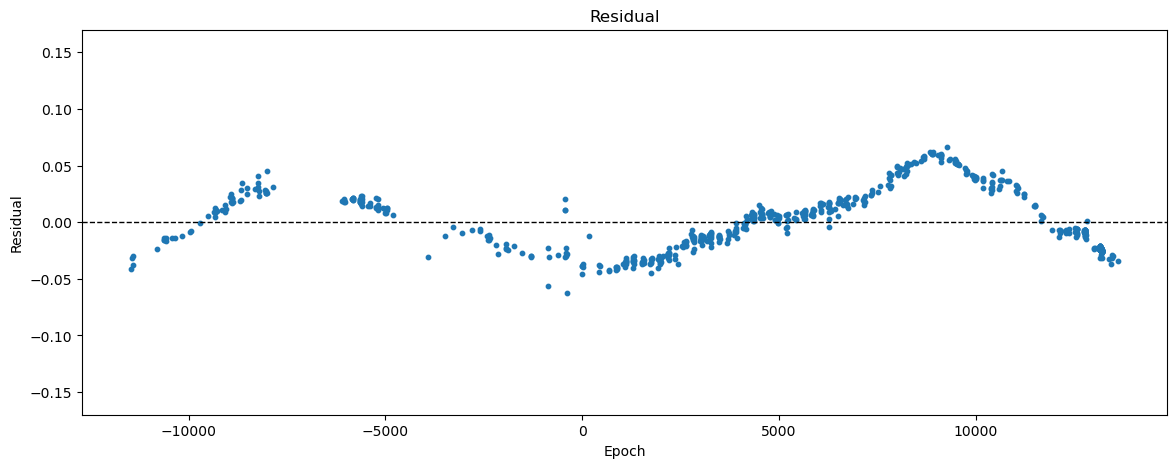

In [13]:
plt.scatter(x, y1, s=10)  

plt.title('Residual')
plt.xlabel('Epoch')
plt.ylabel('Residual')
plt.gcf().set_size_inches(14, 5)
plt.ylim(-0.17, 0.17)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.show()

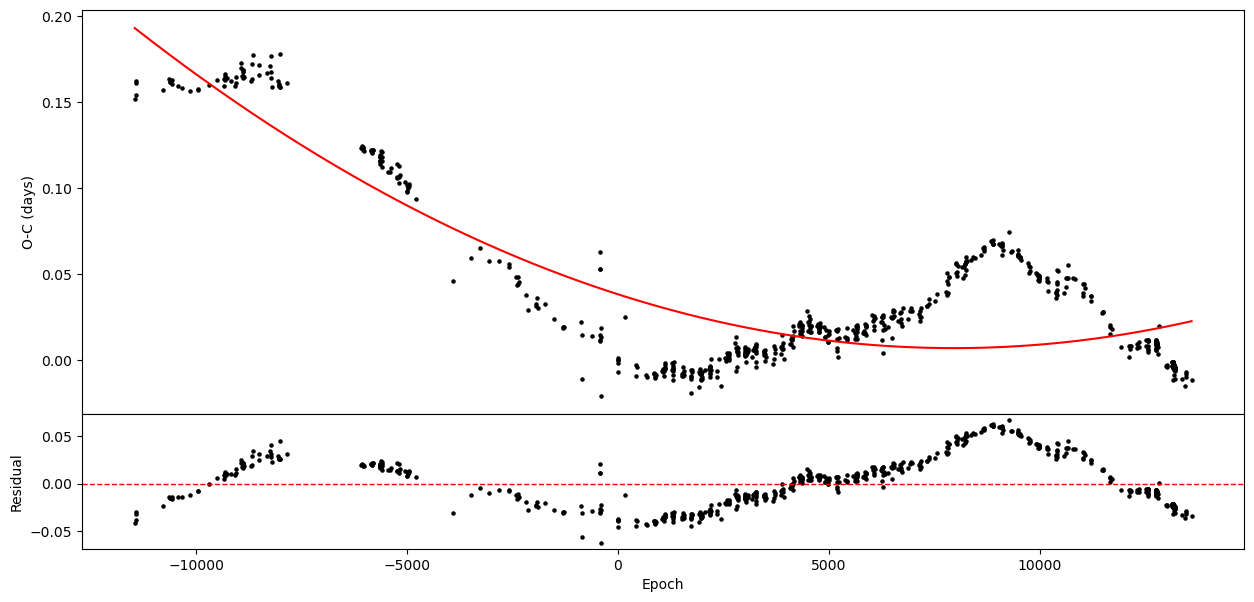

In [15]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0},figsize=(15,7))

axs[0].scatter(x, y, s=5, color='black')
axs[0].plot(x_fit := np.linspace(min(x), max(x), len(x)), parabola(x_fit,*popt),'r-')
axs[0].set(ylabel='O-C (days)')


axs[1].scatter(x, y1, s=5, color='black')
axs[1].axhline(0, color='red', linestyle='--', linewidth=1)
#axs[1].set_ylim(-0.17 , 0.17 )
axs[1].set(ylabel='Residual', xlabel='Epoch')


plt.show()

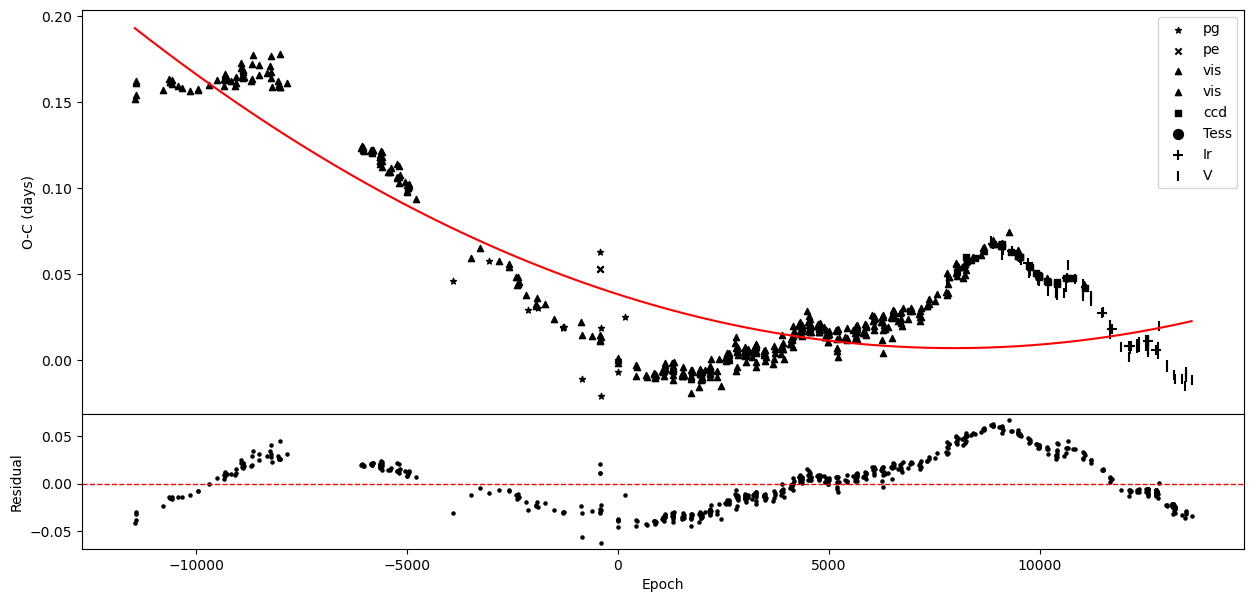

In [16]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, figsize=(15, 7))


pg_mask = (method == 'pg')
axs[0].scatter(x[pg_mask], y[pg_mask], s=20, color='black', marker='*', label='pg')

pe_mask = (method == 'pe')
axs[0].scatter(x[pe_mask], y[pe_mask], s=20, color='black', marker='x', label='pe')


vis_mask = (method == 'vis')
axs[0].scatter(x[vis_mask], y[vis_mask], s=20, color='black', marker='^', label='vis')

Vis_mask = (method == 'Vis')
axs[0].scatter(x[Vis_mask], y[Vis_mask], s=20, color='black', marker='^', label='vis')


ccd_mask = (method == 'ccd')
axs[0].scatter(x[ccd_mask], y[ccd_mask], s=20, color='black', marker='s', label='ccd')


TESS_mask = (method == 'TESS')
axs[0].scatter(x[TESS_mask], y[TESS_mask], s=50, color='black', marker='o', label='Tess')

Ir_mask = (method == 'Ir')
axs[0].scatter(x[Ir_mask], y[Ir_mask], s=50, color='black', marker='+', label='Ir')

V_mask = (method == 'V')
axs[0].scatter(x[V_mask], y[V_mask], s=50, color='black', marker='|', label='V')

axs[0].plot(x_fit, parabola(x_fit, *popt), 'r-')
axs[0].set(ylabel='O-C (days)')
axs[0].legend() 

axs[1].scatter(x, y1, s=5, color='black')
axs[1].axhline(0, color='red', linestyle='--', linewidth=1)
axs[1].set(ylabel='Residual', xlabel='Epoch')

plt.show()